In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("C:\\Users\\vbatr\\Downloads\\Dataset.csv")

In [42]:
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


In [43]:
df.shape

(649, 33)

In [44]:
df.isna().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

In [45]:
df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Feature_1', 'Feature_2', 'Feature_3', 'romantic'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder

df2 = df.copy()
label_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in label_cols:
    mask = df2[col].notna()
    le = LabelEncoder()  # create a new encoder per column
    df2.loc[mask, col] = le.fit_transform(df2.loc[mask, col])

    # Optional: convert to int safely only if no NaNs remain
    if df2[col].isna().sum() == 0:
        df2[col] = df2[col].astype('int64')
    else:
        df2[col] = df2[col].astype('Int64')  # pandas nullable int

In [47]:
df3 = df2.copy()
df3['school'] = df3['school'].map({'GP': 0, 'MS': 1})
df3['sex'] = df3['sex'].map({'F': 0, 'M': 1})
df3['address'] = df3['address'].map({'U': 1, 'R': 0})
df3['Pstatus'] = df3['Pstatus'].map({'T': 1, 'A': 0})
df3['famsize'] = df3['famsize'].map({'LE3': 0, 'GT3': 1})

In [48]:
df4 = df3.copy()
df4.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)

In [49]:
df3[['Mjob', 'Fjob', 'reason', 'guardian']]

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,services,home,mother
4,other,other,home,father
...,...,...,...,...
644,services,other,course,mother
645,teacher,services,course,mother
646,other,other,course,mother
647,services,services,course,mother


In [50]:
df4.dtypes

school          int64
sex             int64
address         int64
famsize       float64
Pstatus         int64
Medu            int64
Fedu          float64
traveltime    float64
failures        int64
schoolsup       int64
famsup          int64
paid            int64
activities      int64
nursery         int64
higher          Int64
internet        int64
famrel          int64
freetime      float64
goout           int64
Dalc            int64
health          int64
absences      float64
G1              int64
G2            float64
G3              int64
Feature_1     float64
Feature_2     float64
Feature_3     float64
romantic        int64
dtype: object

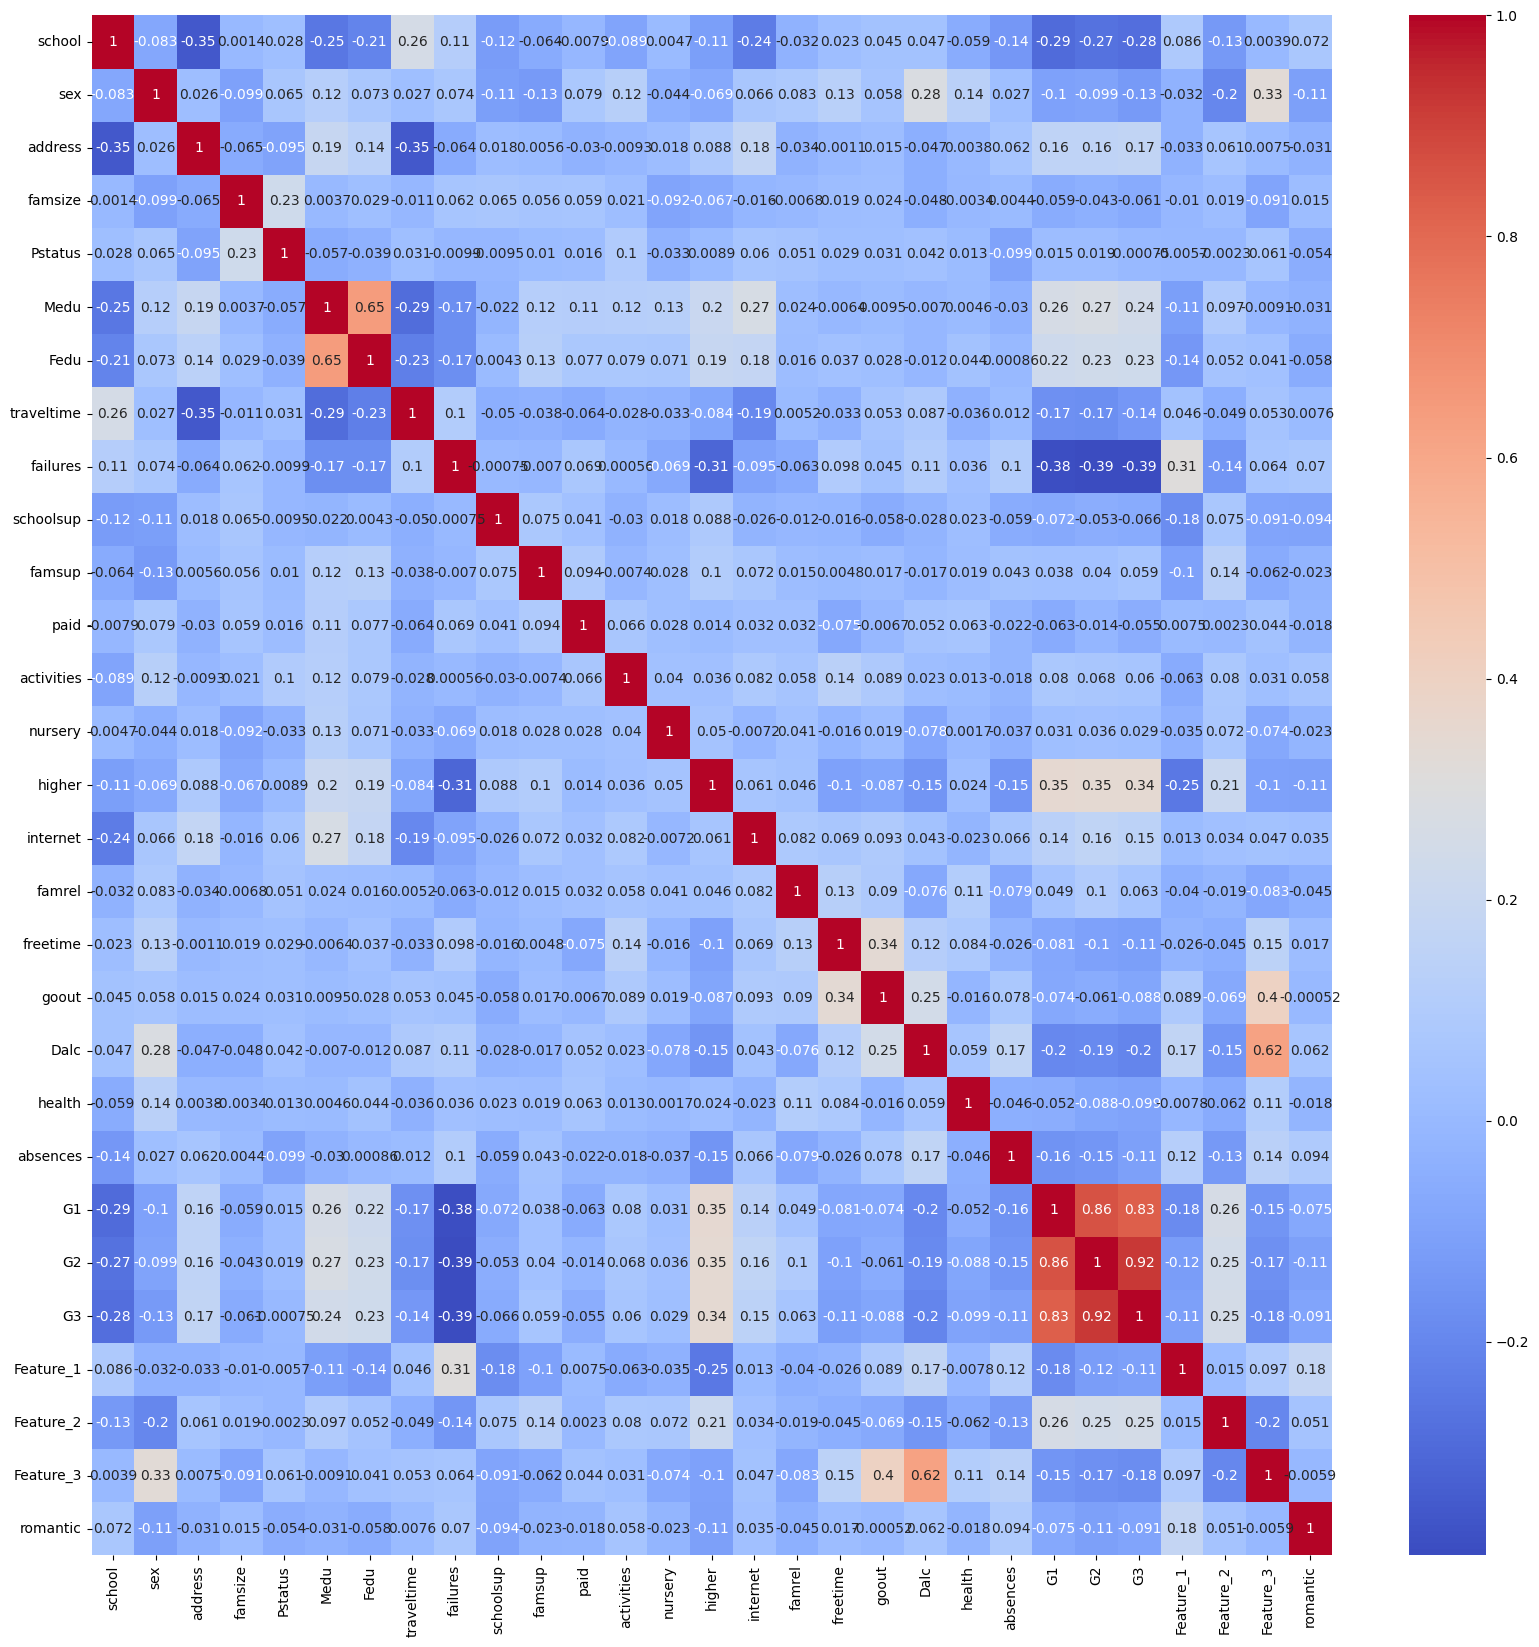

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm')
plt.show()

In [52]:
df3.groupby('failures')['Feature_1'].median()

failures
0    17.0
1    17.0
2    18.0
3    17.0
Name: Feature_1, dtype: float64

In [53]:
df2['Feature_3']

0      1.0
1      1.0
2      3.0
3      1.0
4      2.0
      ... 
644    2.0
645    1.0
646    1.0
647    4.0
648    4.0
Name: Feature_3, Length: 649, dtype: float64

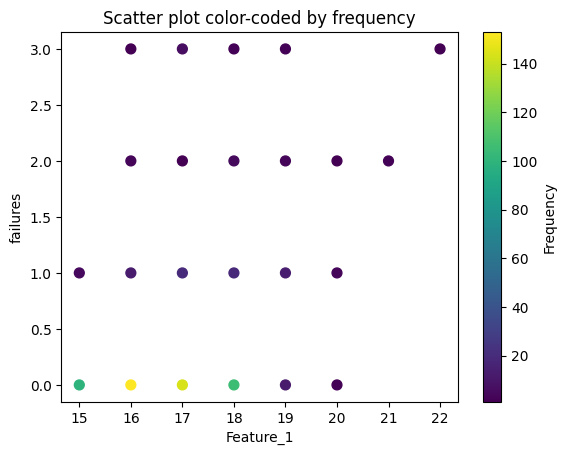

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Step 1: Count frequency of each pair (Feature_1, failures)
freq = df.groupby(['Feature_1', 'failures']).size().reset_index(name='frequency')

# Step 2: Scatter plot with color mapped to frequency
plt.scatter(freq['Feature_1'], freq['failures'], c=freq['frequency'], cmap='viridis', s=50)

plt.colorbar(label='Frequency')
plt.xlabel('Feature_1')
plt.ylabel('failures')
plt.title('Scatter plot color-coded by frequency')
plt.show()

In [55]:
df4.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,0,0,1,1.0,0,4,4.0,2.0,0,1,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,0
1,0,0,1,1.0,1,1,1.0,NaN,0,0,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,0
2,0,0,1,0.0,1,1,1.0,1.0,0,1,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,0
3,0,0,1,1.0,1,4,2.0,1.0,0,0,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,1
4,0,0,1,1.0,1,3,3.0,1.0,0,0,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,0


In [56]:
df.rename(columns={'Feature_1': 'Age of first relationship', 'Feature_2': 'Study Time', 'Feature_3' : 'Social Activity'}, inplace=True)
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Age of first relationship,Study Time,Social Activity,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


In [57]:
df4.rename(columns={'Feature_1': 'Age of first relationship', 'Feature_2': 'Study Time', 'Feature_3' : 'Social Activity'}, inplace=True)
df4.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,Dalc,health,absences,G1,G2,G3,Age of first relationship,Study Time,Social Activity,romantic
0,0,0,1,1.0,0,4,4.0,2.0,0,1,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,0
1,0,0,1,1.0,1,1,1.0,NaN,0,0,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,0
2,0,0,1,0.0,1,1,1.0,1.0,0,1,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,0
3,0,0,1,1.0,1,4,2.0,1.0,0,0,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,1
4,0,0,1,1.0,1,3,3.0,1.0,0,0,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,0


In [58]:
df.isna().sum()[df.isna().sum() > 0]

famsize                      50
Fedu                         73
traveltime                   73
higher                       76
freetime                     45
absences                     69
G2                           35
Age of first relationship    38
Study Time                   46
Social Activity              39
dtype: int64

In [59]:
df[['G1','G2','G3']]

,G1,G2,G3
0,0,11.0,11
1,9,11.0,11
2,12,13.0,12
3,14,14.0,14
4,11,13.0,13
...,...,...,...
644,10,11.0,10
645,15,15.0,16
646,11,12.0,9
647,10,10.0,10


In [60]:
print(df['G1'].min())
print(df['G1'].max())
print(df['G2'].min())
print(df['G2'].max())
print(df['G3'].min())
print(df['G3'].max())

0
19
0.0
19.0
0
19


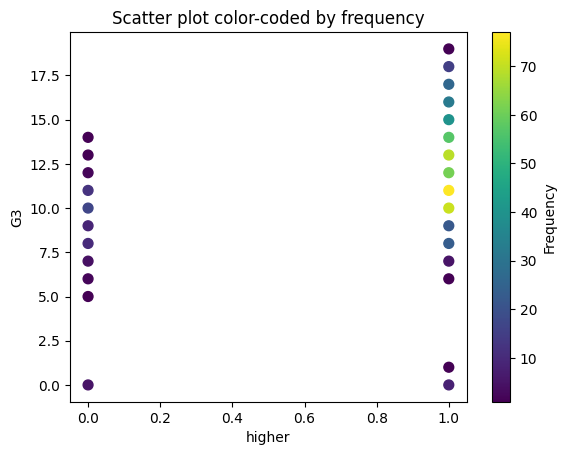

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Step 1: Count frequency of each pair (Feature_1, failures)
freq = df4.groupby(['higher', 'G3']).size().reset_index(name='frequency')

# Step 2: Scatter plot with color mapped to frequency
plt.scatter(freq['higher'], freq['G3'], c=freq['frequency'], cmap='viridis', s=50)

plt.colorbar(label='Frequency')
plt.xlabel('higher')
plt.ylabel('G3')
plt.title('Scatter plot color-coded by frequency')
plt.show()

In [62]:
df4[(df4['higher'].isna()) & (df4['G3'] > 10)]

,school,sex,address,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,Dalc,health,absences,G1,G2,G3,Age of first relationship,Study Time,Social Activity,romantic
8,0,1,1,0.0,0,3,2.0,1.0,0,0,...,1,1,0.0,15,16.0,17,15.0,2.0,1.0,0
10,0,0,1,1.0,1,4,4.0,1.0,0,0,...,1,2,2.0,14,14.0,14,15.0,2.0,2.0,0
15,0,0,1,1.0,1,4,4.0,1.0,0,0,...,1,2,6.0,17,17.0,17,16.0,1.0,2.0,0
16,0,0,1,NaN,1,4,4.0,1.0,0,0,...,1,2,10.0,13,13.0,14,16.0,3.0,2.0,0
25,0,0,1,1.0,1,2,2.0,1.0,0,0,...,1,5,6.0,10,11.0,12,16.0,1.0,3.0,0
26,0,1,1,1.0,1,2,2.0,1.0,0,0,...,1,5,8.0,11,NaN,12,15.0,1.0,2.0,0
28,0,1,1,0.0,0,3,4.0,1.0,0,1,...,1,5,2.0,12,12.0,13,16.0,2.0,NaN,0
30,0,1,1,1.0,1,4,4.0,1.0,0,0,...,3,5,NaN,10,11.0,11,15.0,2.0,4.0,0
44,0,0,1,0.0,1,2,2.0,2.0,1,1,...,2,5,14.0,10,11.0,11,16.0,2.0,2.0,0
46,0,0,1,0.0,0,3,3.0,1.0,0,0,...,1,3,6.0,13,12.0,13,16.0,2.0,4.0,0


In [63]:
df.loc[(df['G3'] > 7) & (df['higher'].isna()), 'higher'] = 'yes'
df['higher'] = df['higher'].fillna('no')

In [64]:
df4.loc[(df['G3'] > 7) & (df4['higher'].isna()), 'higher'] = 1
df4['higher'] = df4['higher'].fillna(0)

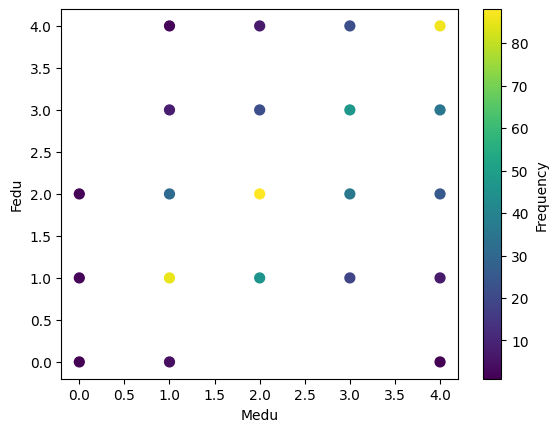

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

freq = df4.groupby(['Medu', 'Fedu']).size().reset_index(name='frequency')

plt.scatter(freq['Medu'], freq['Fedu'], c=freq['frequency'], cmap='viridis', s=50)

plt.colorbar(label='Frequency')
plt.xlabel('Medu')
plt.ylabel('Fedu')
plt.show()

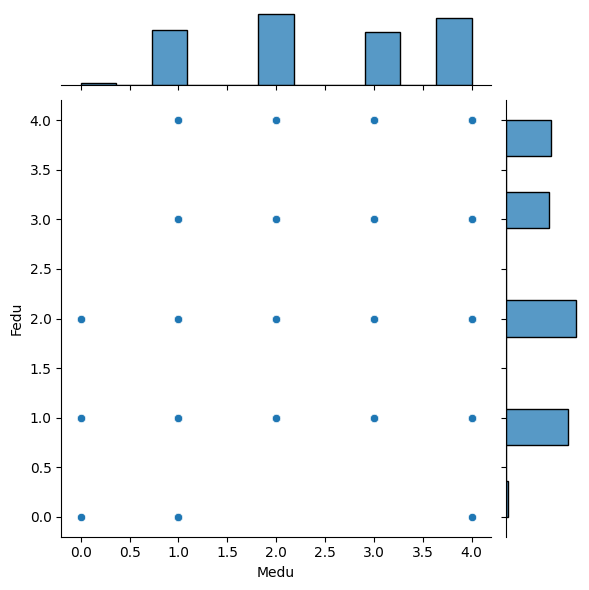

In [66]:
sns.jointplot(x='Medu', y='Fedu', data=df, kind='scatter')

<Axes: xlabel='Medu', ylabel='Fedu'>

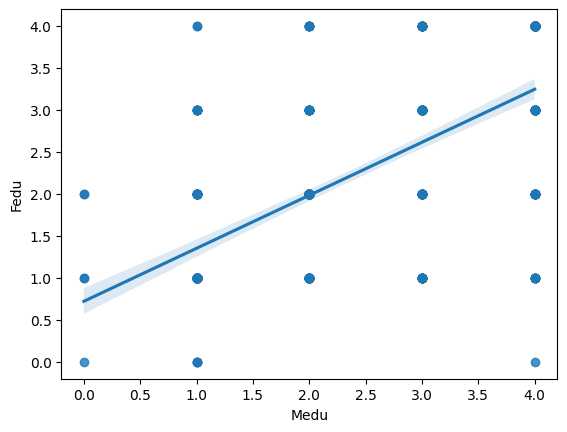

In [67]:
sns.regplot(x='Medu', y='Fedu', data=df)

<Axes: xlabel='Fedu', ylabel='Medu'>

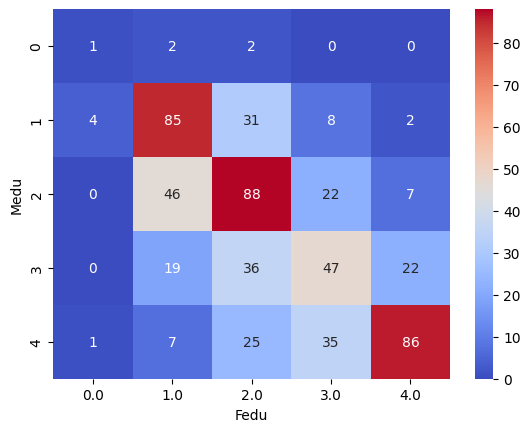

In [68]:
import pandas as pd
import seaborn as sns

# Create a crosstab (2D frequency table)
heat_data = pd.crosstab(df['Medu'], df['Fedu'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [69]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

train_data = df[df['Fedu'].notnull() & df['Medu'].notnull()]

model = LinearRegression()
model.fit(train_data[['Medu']], train_data['Fedu'])

mask = df['Fedu'].isnull() & df['Medu'].notnull()
predicted_fedu = model.predict(df.loc[mask, ['Medu']])

predicted_fedu = np.clip(np.round(predicted_fedu), 0, 4).astype(int)

df.loc[mask, 'Fedu'] = predicted_fedu

<Axes: xlabel='Fedu', ylabel='Medu'>

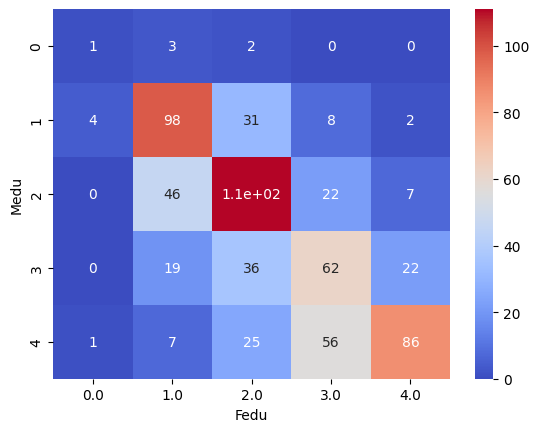

In [70]:
import pandas as pd
import seaborn as sns
heat_data = pd.crosstab(df['Medu'], df['Fedu'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [71]:
df4['Fedu'] = df['Fedu']

In [72]:
df.isna().sum()[df.isna().sum()>0]

famsize                      50
traveltime                   73
freetime                     45
absences                     69
G2                           35
Age of first relationship    38
Study Time                   46
Social Activity              39
dtype: int64

<Axes: xlabel='Pstatus', ylabel='famsize'>

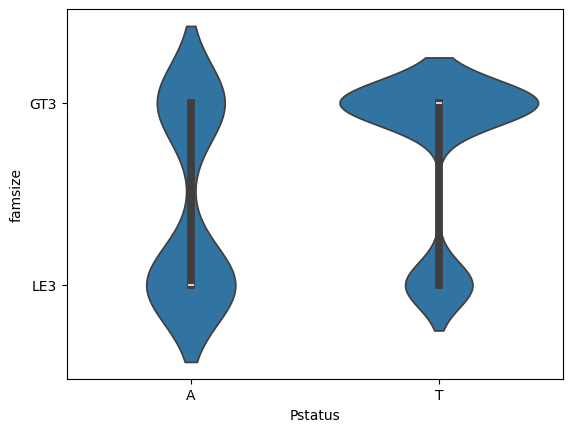

In [73]:
sns.violinplot(x='Pstatus', y='famsize', data=df)

<Axes: xlabel='Pstatus', ylabel='famsize'>

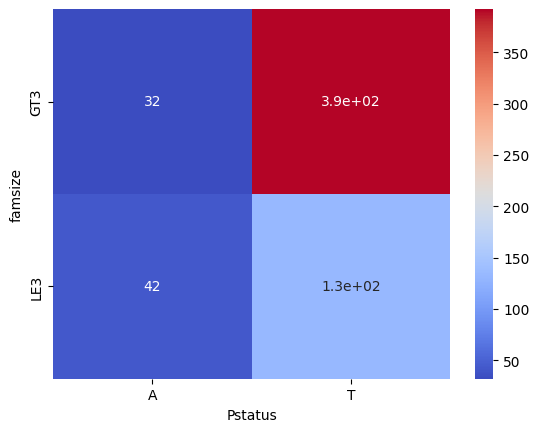

In [74]:
import pandas as pd
import seaborn as sns
heat_data = pd.crosstab(df['famsize'], df['Pstatus'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [75]:
df.groupby('Pstatus')['famsize'].value_counts()

Pstatus  famsize
A        LE3         42
         GT3         32
T        GT3        392
         LE3        133
Name: count, dtype: int64

In [76]:
dfu2 = df.copy()

In [77]:
df.groupby(['failures', 'Pstatus'])['famsize'].value_counts()

failures  Pstatus  famsize
0         A        LE3         37
                   GT3         26
          T        GT3        322
                   LE3        117
1         A        LE3          3
                   GT3          2
          T        GT3         54
                   LE3         10
2         A        GT3          3
                   LE3          2
          T        GT3          6
                   LE3          5
3         A        GT3          1
          T        GT3         10
                   LE3          1
Name: count, dtype: int64

In [78]:
df.groupby(['Pstatus', 'famsup'])['famsize'].value_counts()

Pstatus  famsup  famsize
A        no      LE3         16
                 GT3         14
         yes     LE3         26
                 GT3         18
T        no      GT3        140
                 LE3         58
         yes     GT3        252
                 LE3         75
Name: count, dtype: int64

In [79]:
dfu3 = df.copy()

In [80]:
import numpy as np

# Define weighted probabilities based on your data
def impute_famsize(pstatus):
    if pstatus == 'A':
        return np.random.choice(['LE3', 'GT3'], p=[42/(42+32), 32/(42+32)])
    elif pstatus == 'T':
        return np.random.choice(['GT3', 'LE3'], p=[392/(392+133), 133/(392+133)])
    else:
        return np.nan  # In case Pstatus is missing too

# Apply to missing values
mask = dfu3['famsize'].isna()
dfu3.loc[mask, 'famsize'] = dfu3.loc[mask, 'Pstatus'].apply(impute_famsize)

In [81]:
df['famsize'] = dfu3['famsize']

In [82]:
df.groupby(['address', 'school'])['traveltime'].value_counts()

address  school  traveltime
R        GP      2.0            30
                 1.0            28
                 3.0             7
                 4.0             4
         MS      2.0            53
                 1.0            25
                 3.0            25
                 4.0             4
U        GP      1.0           220
                 2.0            69
                 3.0            11
                 4.0             5
         MS      1.0            47
                 2.0            43
                 3.0             4
                 4.0             1
Name: count, dtype: int64

<Axes: xlabel='school', ylabel='traveltime'>

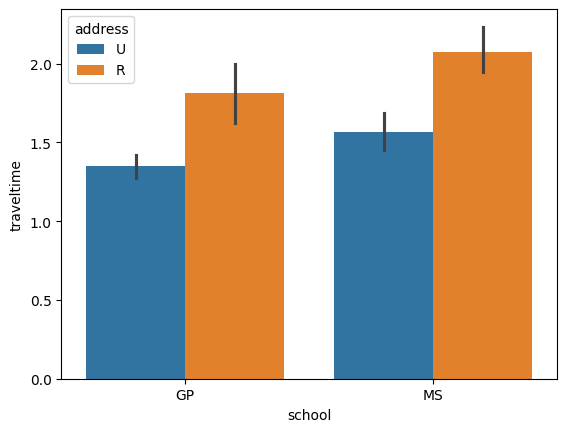

In [83]:
sns.barplot(x='school', y='traveltime', hue='address', data=df)

In [84]:
dfu4 = df.copy()

<Axes: xlabel='G3', ylabel='G2'>

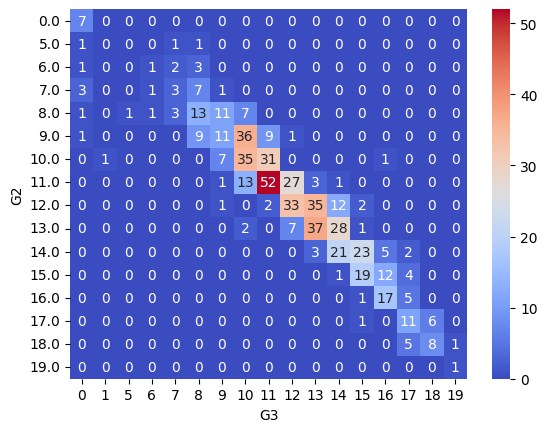

In [85]:
import pandas as pd
import seaborn as sns
# Create a crosstab (2D frequency table)
heat_data = pd.crosstab(dfu4['G2'], dfu4['G3'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [86]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

train_dfu4 = dfu4[dfu4['G2'].notna() & dfu4['G3'].notna()]
X_train = train_dfu4[['G3']]
y_train = train_dfu4['G2']

model = LinearRegression()
model.fit(X_train, y_train)

test_dfu4 = dfu4[dfu4['G2'].isna() & dfu4['G3'].notna()]
X_test = test_dfu4[['G3']]

predicted_G2 = model.predict(X_test)

predicted_G2 = np.clip(np.round(predicted_G2), 0, 19).astype(int)

dfu4.loc[dfu4['G2'].isna() & dfu4['G3'].notna(), 'G2'] = predicted_G2


<Axes: xlabel='G3', ylabel='G2'>

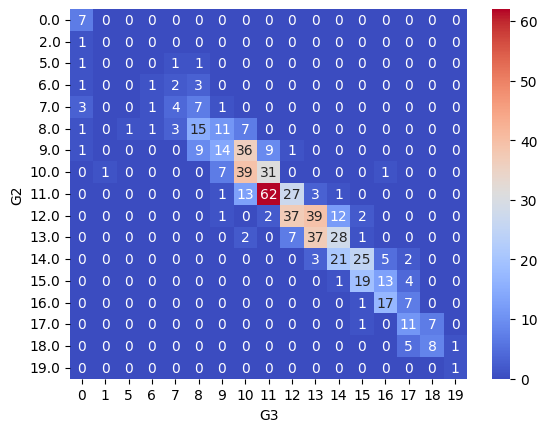

In [88]:
import pandas as pd
import seaborn as sns
heat_data = pd.crosstab(dfu4['G2'], dfu4['G3'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [89]:
df['G2'] = dfu4['G2']

<Axes: xlabel='Dalc', ylabel='goout'>

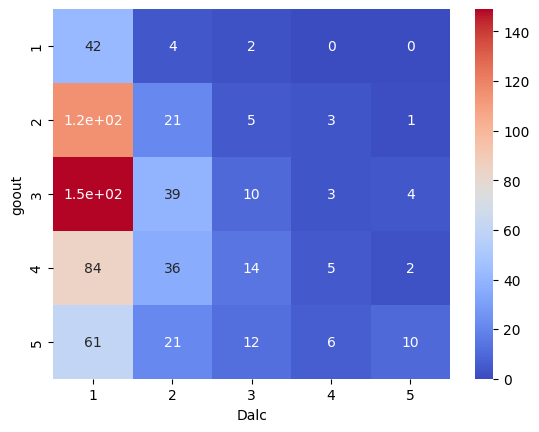

In [90]:
import pandas as pd
import seaborn as sns
# Create a crosstab (2D frequency table)
heat_data = pd.crosstab(dfu4['goout'], dfu4['Dalc'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [91]:
dfu4['Social'] = (dfu4['goout'] * dfu4['Dalc'])

<Axes: xlabel='Social', ylabel='Social Activity'>

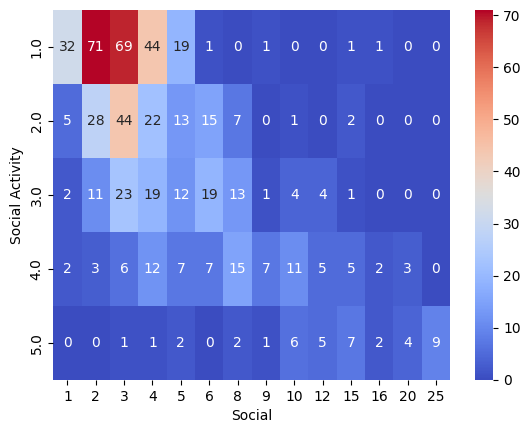

In [92]:
import pandas as pd
import seaborn as sns
heat_data = pd.crosstab(dfu4['Social Activity'], dfu4['Social'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [93]:
from sklearn.linear_model import LinearRegression
import numpy as np

dfu4_train = dfu4[dfu4['Social Activity'].notna() & dfu4['Social'].notna()]
dfu4_missing = dfu4[dfu4['Social Activity'].isna() & dfu4['Social'].notna()]

X_train = dfu4_train[['Social']]
y_train = dfu4_train['Social Activity']

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(dfu4_missing[['Social']])

predicted = np.clip(np.round(predicted), 1, 5)

dfu4.loc[dfu4_missing.index, 'Social Activity'] = predicted

<Axes: xlabel='Social', ylabel='Social Activity'>

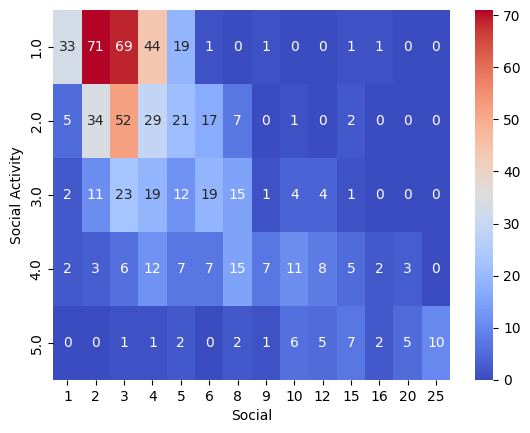

In [94]:
import pandas as pd
import seaborn as sns
# Create a crosstab (2D frequency table)
heat_data = pd.crosstab(dfu4['Social Activity'], dfu4['Social'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [95]:
df.groupby(['Dalc', 'goout'])['Social Activity'].value_counts()

Dalc  goout  Social Activity
1     1      1.0                32
             2.0                 5
             3.0                 2
             4.0                 2
      2      1.0                71
                                ..
5     3      5.0                 2
             1.0                 1
             2.0                 1
      4      5.0                 2
      5      5.0                 9
Name: count, Length: 71, dtype: int64

<Axes: xlabel='goout', ylabel='Social Activity'>

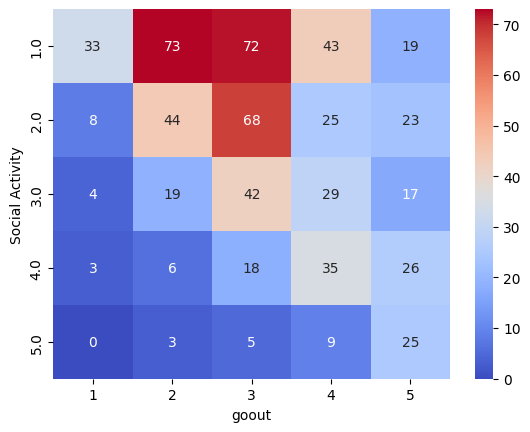

In [96]:
import pandas as pd
import seaborn as sns
# Create a crosstab (2D frequency table)
heat_data = pd.crosstab(dfu4['Social Activity'], dfu4['goout'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [97]:
df['Social Activity'] = dfu4['Social Activity']

In [98]:
dfu5 = df4.copy()

In [99]:
dfu5['trav'] = (dfu5['address']) + dfu5['Medu'] - (dfu5['school'])

<Axes: xlabel='trav', ylabel='traveltime'>

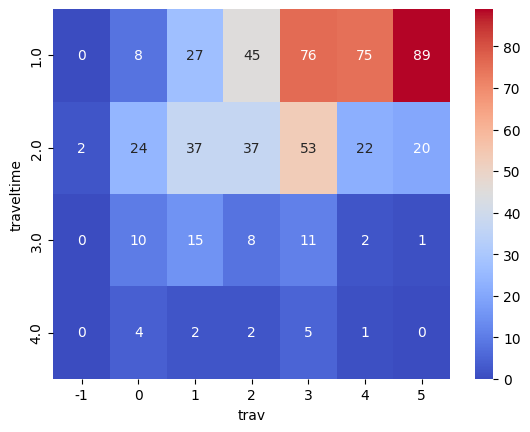

In [100]:
import pandas as pd
import seaborn as sns
# Create a crosstab (2D frequency table)
heat_data = pd.crosstab(dfu5['traveltime'], dfu5['trav'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

<Axes: xlabel='traveltime', ylabel='trav'>

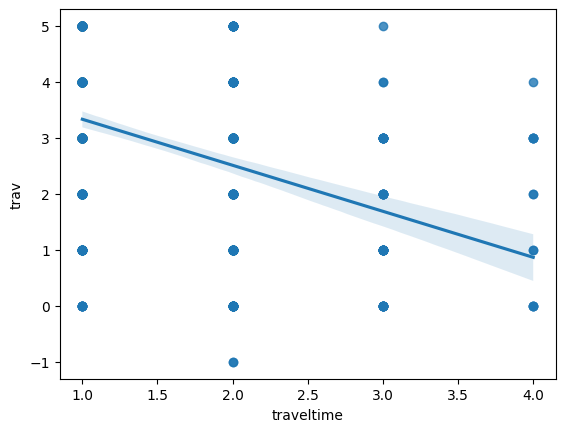

In [101]:
sns.regplot(x='traveltime', y='trav', data=dfu5)


In [102]:
from sklearn.linear_model import LinearRegression
import numpy as np

dfu5_train = dfu5[dfu5['traveltime'].notna() & dfu5['trav'].notna()]
dfu5_missing = dfu5[dfu5['traveltime'].isna() & dfu5['trav'].notna()]

X_train = dfu5_train[['trav']]
y_train = dfu5_train['traveltime']

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(dfu5_missing[['trav']])

predicted = np.clip(np.round(predicted), 1, 4)

dfu5.loc[dfu5_missing.index, 'traveltime'] = predicted


<Axes: xlabel='trav', ylabel='traveltime'>

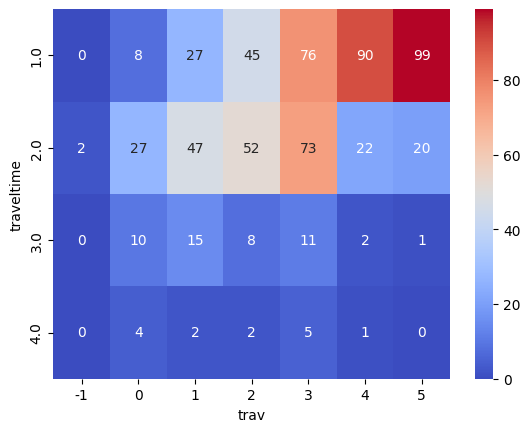

In [103]:
import pandas as pd
import seaborn as sns
heat_data = pd.crosstab(dfu5['traveltime'], dfu5['trav'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [104]:
df['traveltime'] = dfu5['traveltime']

<Axes: xlabel='freetime', ylabel='goout'>

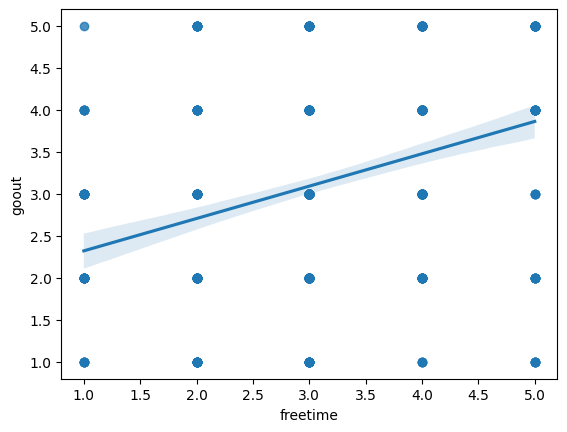

In [105]:
sns.regplot(x='freetime', y='goout', data=dfu5)

<Axes: xlabel='goout', ylabel='freetime'>

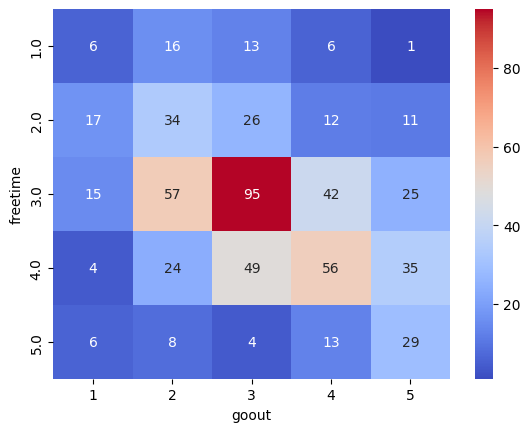

In [107]:
import pandas as pd
import seaborn as sns
heat_data = pd.crosstab(dfu5['freetime'], dfu5['goout'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [108]:
from sklearn.linear_model import LinearRegression
import numpy as np

dfu5_train = dfu5[dfu5['freetime'].notna() & dfu5['goout'].notna()]
dfu5_missing = dfu5[dfu5['freetime'].isna() & dfu5['goout'].notna()]

X_train = dfu5_train[['goout']]
y_train = dfu5_train['freetime']

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(dfu5_missing[['goout']])

predicted = np.clip(np.round(predicted), 1, 5)

dfu5.loc[dfu5_missing.index, 'freetime'] = predicted


In [109]:
dfu5['ga'] = dfu5['failures'] + dfu5['Dalc'] - dfu5['higher']

<Axes: xlabel='ga', ylabel='Age of first relationship'>

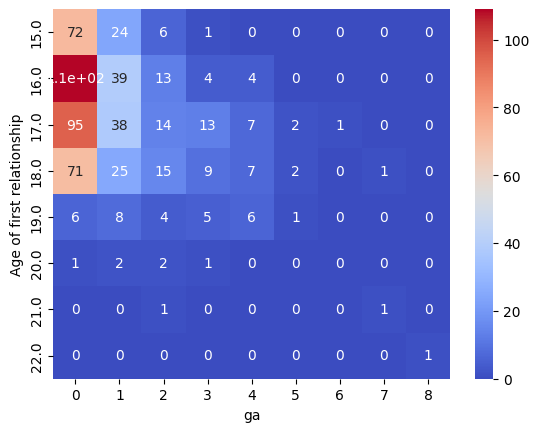

In [110]:
import pandas as pd
import seaborn as sns
heat_data = pd.crosstab(dfu5['Age of first relationship'], dfu5['ga'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

<Axes: xlabel='failures', ylabel='Age of first relationship'>

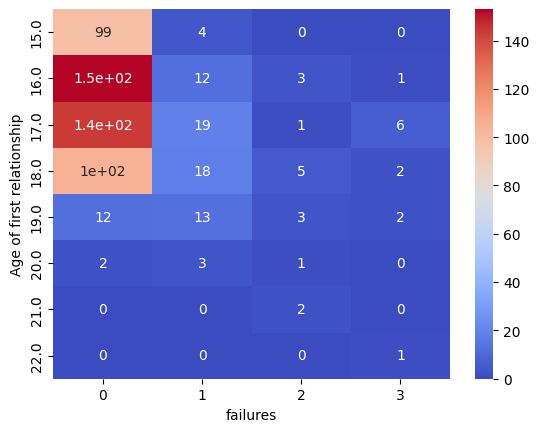

In [111]:
import pandas as pd
import seaborn as sns
heat_data = pd.crosstab(dfu5['Age of first relationship'], dfu5['failures'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [112]:
df['freetime'] = dfu5['freetime']

<Axes: xlabel='G1', ylabel='Age of first relationship'>

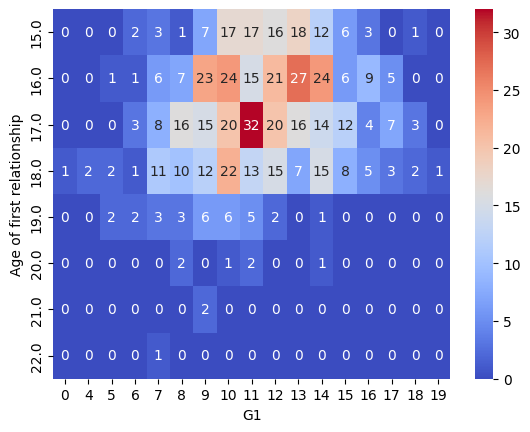

In [113]:
import pandas as pd
import seaborn as sns
heat_data = pd.crosstab(dfu5['Age of first relationship'], dfu5['G1'])

sns.heatmap(heat_data, annot=True, cmap='coolwarm')

In [114]:
from sklearn.linear_model import LinearRegression
import numpy as np

dfu5_train = dfu5[dfu5['Age of first relationship'].notna() & dfu5['failures'].notna()]
dfu5_missing = dfu5[dfu5['Age of first relationship'].isna() & dfu5['failures'].notna()]

X_train = dfu5_train[['failures']]
y_train = dfu5_train['Age of first relationship']

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(dfu5_missing[['failures']])

predicted = np.clip(np.round(predicted), 15, 22)

dfu5.loc[dfu5_missing.index, 'Age of first relationship'] = predicted

In [115]:
df['romantic'] = df4['romantic']

In [116]:
df['Age of first relationship'] = dfu5['Age of first relationship']

In [117]:
df.isna().sum()[df.isna().sum() > 0]

absences      69
Study Time    46
dtype: int64

In [118]:
df['absences'] = df['absences'].fillna(df['absences'].median())

In [119]:
df['Study Time'] = df['Study Time'].fillna(df['Study Time'].median())

In [120]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [125]:
dfd = df.copy()

Accuracy: 0.6153846153846154


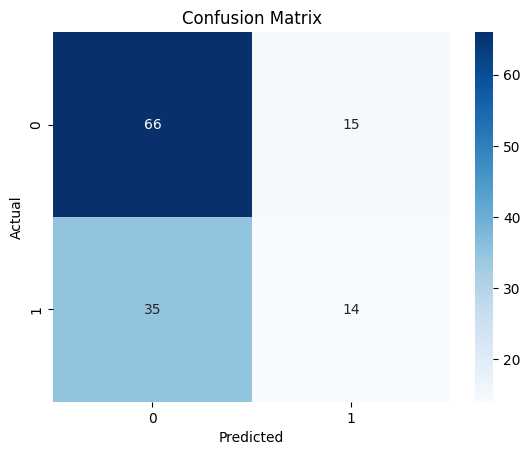

In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

dfd['romantic'] = dfd['romantic'].map({'yes': 1, 'no': 0})

features = [
    'sex', 'address', 'famsize', 'Pstatus', 'Medu',
    'Mjob', 'reason', 'traveltime', 'failures',
    'schoolsup', 'famsup', 'paid', 'activities',
    'higher', 'freetime', 'goout', 
    'absences', 'G1', 'G2', 'Age of first relationship', 'Social Activity'
]

df_model = df[features + ['romantic']].dropna()

X = df_model[features]
y = df_model['romantic']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [195]:
df['romantic'] = df4['romantic']
dfd = df.copy()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

df_model = dfd.copy()

df_model = df_model.dropna(subset=['romantic'])

categorical_cols = df_model.select_dtypes(include='object').columns.tolist()
if 'romantic' in categorical_cols:
    categorical_cols.remove('romantic', '')
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le

target_encoder = LabelEncoder()
df_model['romantic'] = target_encoder.fit_transform(df_model['romantic'])

df_model = df_model.dropna()

X = df_model.drop(columns=['romantic'])
y = df_model['romantic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.6153846153846154


Text(0.5, 1.02, "Father's Education vs Final Grade")

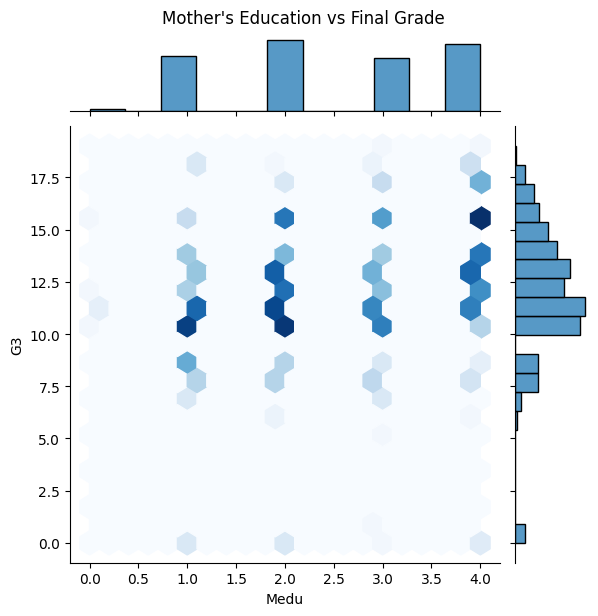

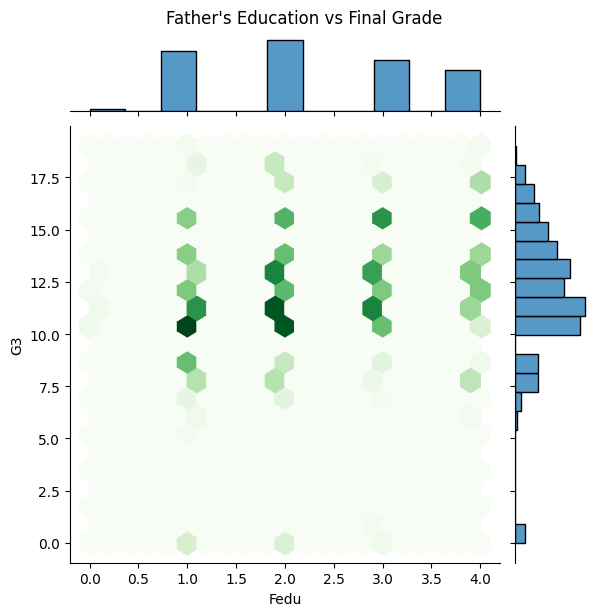

In [ ]:
# Parents eduction affects childs grades

sns.jointplot(data=df, x='Medu', y='G3', kind='hex', gridsize=20, cmap='Blues')
plt.suptitle('Mother\'s Education vs Final Grade', y=1.02)

sns.jointplot(data=df, x='Fedu', y='G3', kind='hex', gridsize=20, cmap='Greens')
plt.suptitle('Father\'s Education vs Final Grade', y=1.02)

C:\Users\vbatr\AppData\Local\Temp\ipykernel_1920\3993166933.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dalc', y='G3', data=df, palette='coolwarm', inner='quartile')


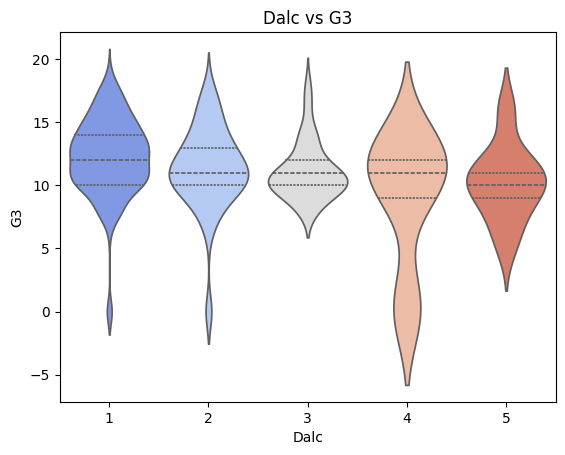

In [200]:
#Effect of alcohol consumtion on grades

import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='Dalc', y='G3', data=df, palette='coolwarm', inner='quartile')
plt.title('Dalc vs G3')
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.show()

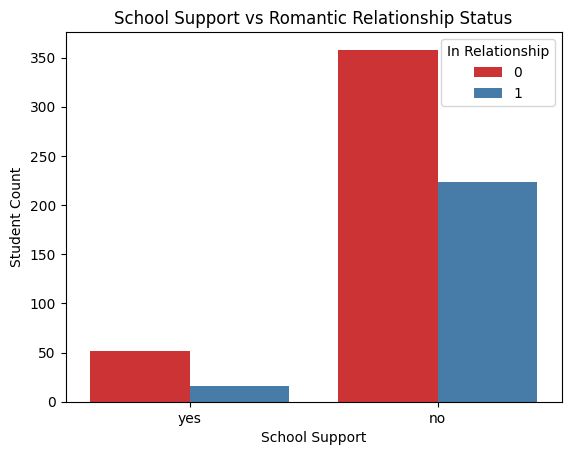

In [ ]:
#Effect of school support on relationship status
sns.countplot(x='schoolsup', hue='romantic', data=df, palette='Set1')
plt.title('School Support vs Romantic Relationship Status')
plt.xlabel('School Support')
plt.ylabel('Student Count')
plt.legend(title='In Relationship')
plt.show()


C:\Users\vbatr\AppData\Local\Temp\ipykernel_1920\3246376206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='traveltime', y='G3', data=df, inner='quartile', palette='Set3')


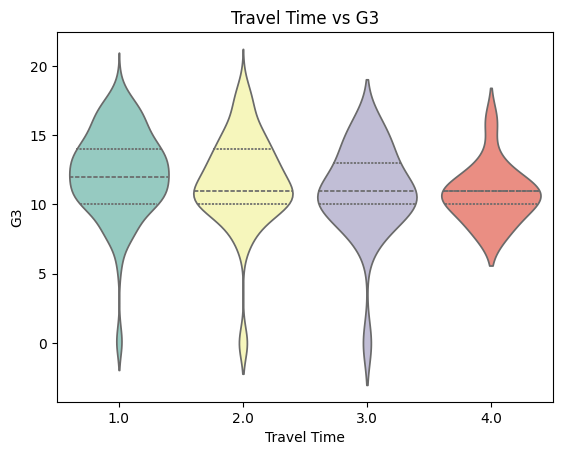

In [ ]:
# Effect of travel time on grades

sns.violinplot(x='traveltime', y='G3', data=df, inner='quartile', palette='Set3')
plt.title('Travel Time vs G3')
plt.xlabel('Travel Time')
plt.ylabel('G3')
plt.show()


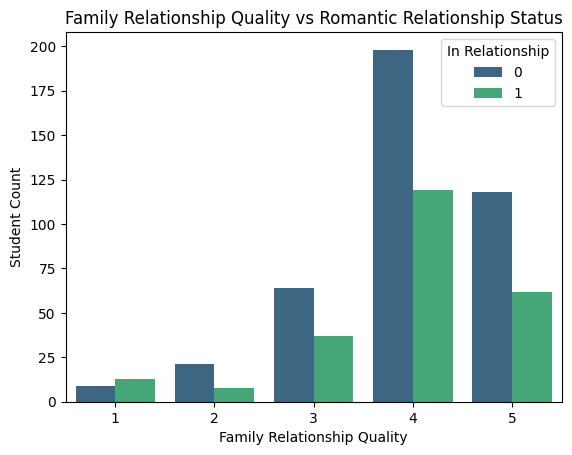

In [203]:
# Dependence of family relationship quality on romantic relationship status
sns.countplot(x='famrel', hue='romantic', data=df, palette='viridis')
plt.title('Family Relationship Quality vs Romantic Relationship Status')
plt.xlabel('Family Relationship Quality')
plt.ylabel('Student Count')
plt.legend(title='In Relationship')
plt.show()
